In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from scipy.ndimage import minimum_filter, maximum_filter, median_filter

## 1. Load Image using cv2 Library

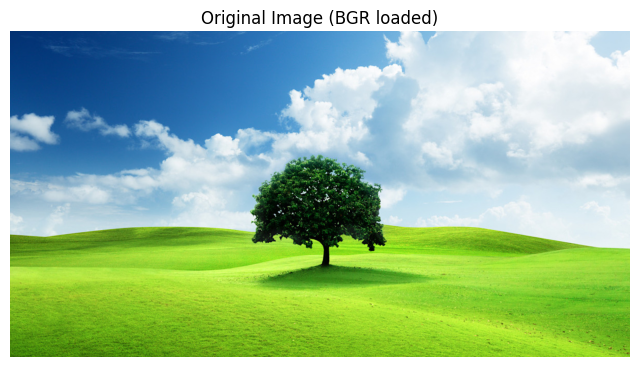

In [3]:
image = cv2.imread('img.jpg')
if image is None:
    print("Creating sample image for demonstration")
    image = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (BGR loaded)')
plt.axis('off')
plt.show()

## 2. Convert BGR to RGB and Grayscale

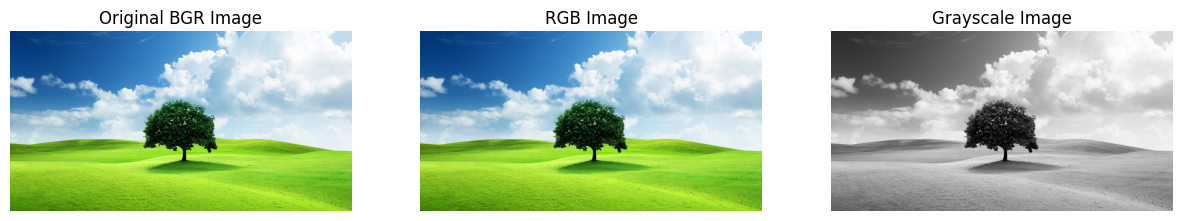

In [4]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original BGR Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

## 3. Add Gaussian Noise with Various Densities

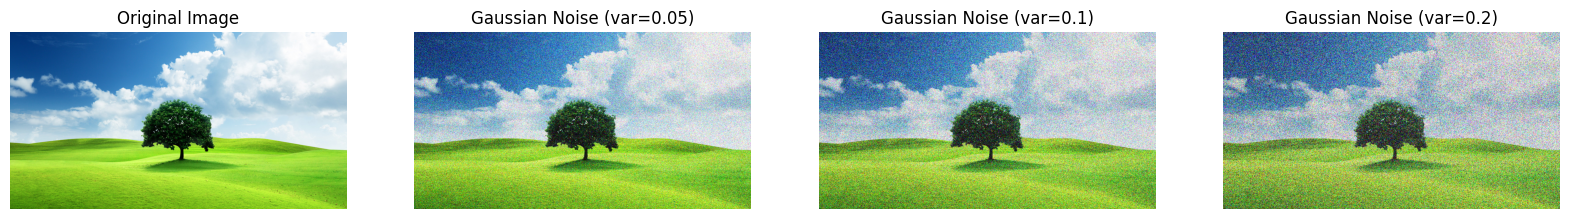

In [5]:
noise_levels = [0.05, 0.1, 0.2]
noisy_images = []

for var in noise_levels:
    noisy = random_noise(rgb_image, mode='gaussian', var=var)
    noisy = (noisy * 255).astype(np.uint8)
    noisy_images.append(noisy)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

for i, (noisy, var) in enumerate(zip(noisy_images, noise_levels)):
    plt.subplot(1, 4, i+2)
    plt.imshow(noisy)
    plt.title(f'Gaussian Noise (var={var})')
    plt.axis('off')
plt.show()

## 4. Apply Linear Filters - Box Filter and Gaussian Blur

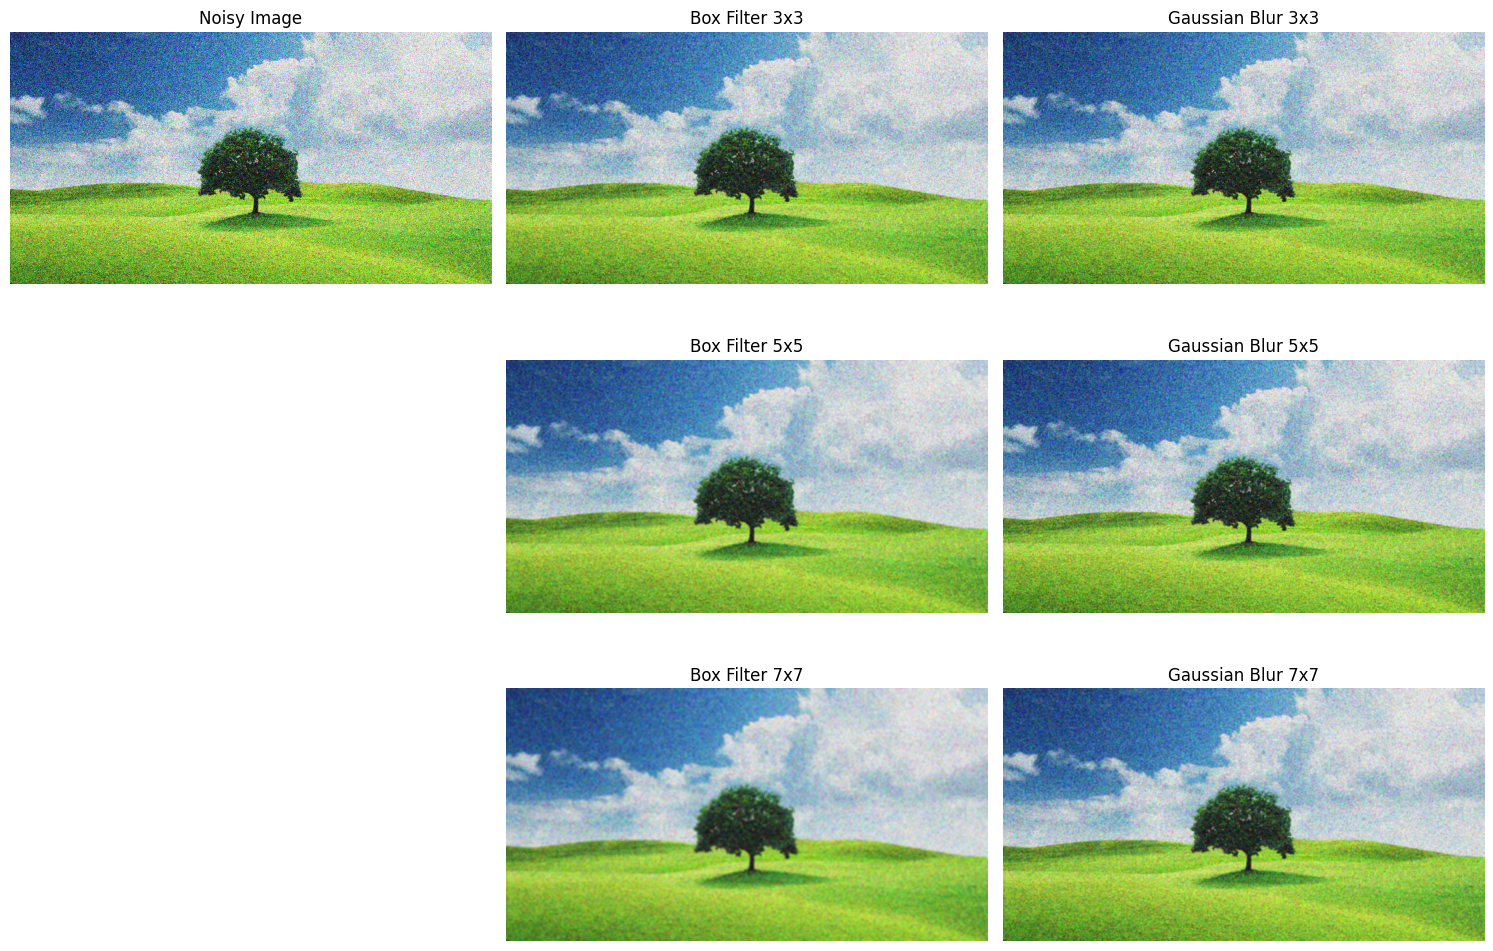

In [6]:
noisy_test = noisy_images[1]
kernel_sizes = [3, 5, 7]

plt.figure(figsize=(20, 10))

plt.subplot(3, 4, 1)
plt.imshow(noisy_test)
plt.title('Noisy Image')
plt.axis('off')

for i, ksize in enumerate(kernel_sizes):
    box_filtered = cv2.boxFilter(noisy_test, -1, (ksize, ksize))
    gaussian_filtered = cv2.GaussianBlur(noisy_test, (ksize, ksize), 0)
    
    plt.subplot(3, 4, i*4 + 2)
    plt.imshow(box_filtered)
    plt.title(f'Box Filter {ksize}x{ksize}')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4 + 3)
    plt.imshow(gaussian_filtered)
    plt.title(f'Gaussian Blur {ksize}x{ksize}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Apply Laplacian Filter for Edge Detection

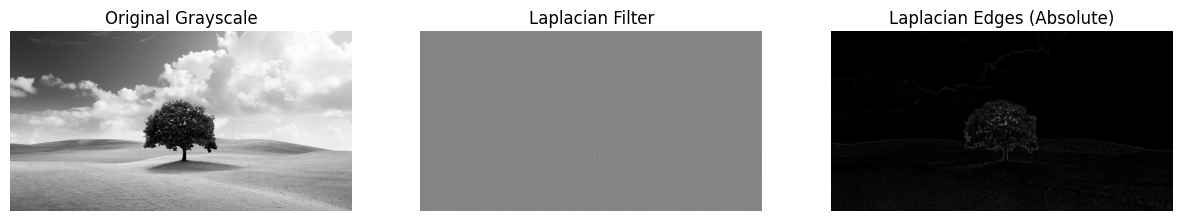

In [7]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edges (Absolute)')
plt.axis('off')
plt.show()

## 6. Add Salt Noise and Apply Min Filter

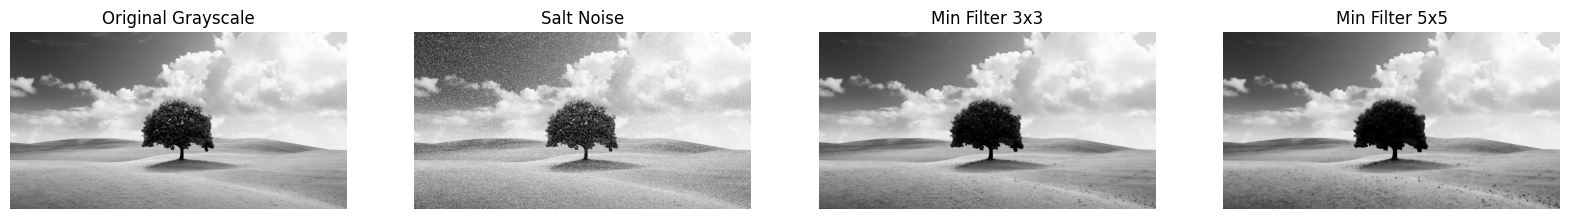

In [8]:
salt_noisy = random_noise(gray_image, mode='salt', amount=0.1)
salt_noisy = (salt_noisy * 255).astype(np.uint8)

min_filtered_3x3 = minimum_filter(salt_noisy, size=3)
min_filtered_5x5 = minimum_filter(salt_noisy, size=5)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(salt_noisy, cmap='gray')
plt.title('Salt Noise')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(min_filtered_3x3, cmap='gray')
plt.title('Min Filter 3x3')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(min_filtered_5x5, cmap='gray')
plt.title('Min Filter 5x5')
plt.axis('off')
plt.show()

## 7. Add Pepper Noise and Apply Max Filter

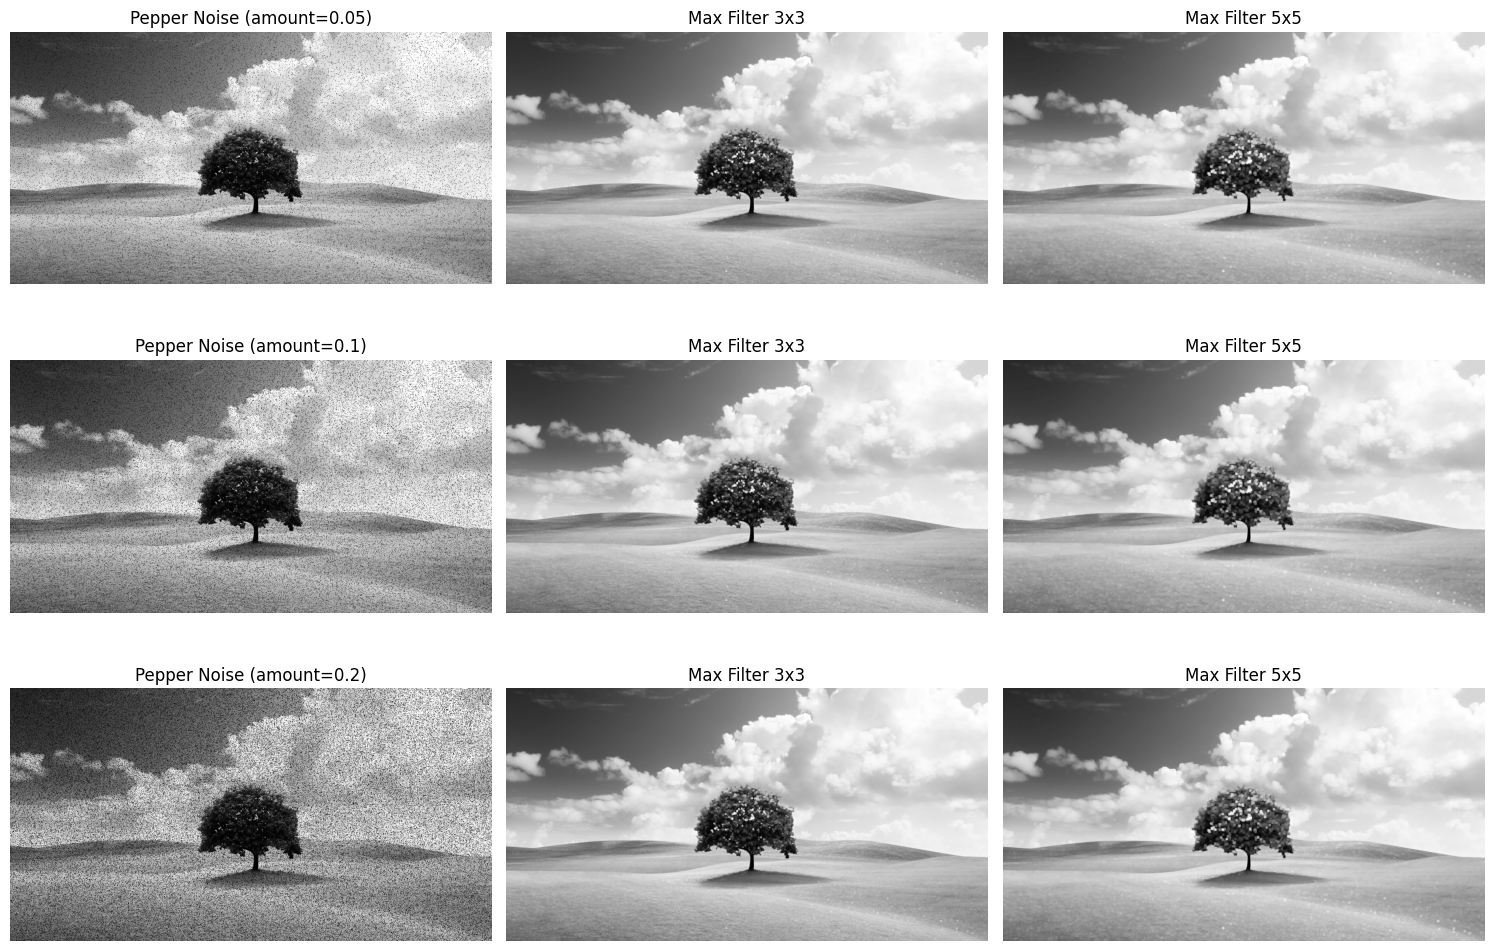

In [9]:
pepper_intensities = [0.05, 0.1, 0.2]
pepper_images = []

for amount in pepper_intensities:
    pepper_noisy = random_noise(gray_image, mode='pepper', amount=amount)
    pepper_noisy = (pepper_noisy * 255).astype(np.uint8)
    pepper_images.append(pepper_noisy)

plt.figure(figsize=(20, 10))

for i, (pepper_img, amount) in enumerate(zip(pepper_images, pepper_intensities)):
    max_filtered_3x3 = maximum_filter(pepper_img, size=3)
    max_filtered_5x5 = maximum_filter(pepper_img, size=5)
    
    plt.subplot(3, 4, i*4 + 1)
    plt.imshow(pepper_img, cmap='gray')
    plt.title(f'Pepper Noise (amount={amount})')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4 + 2)
    plt.imshow(max_filtered_3x3, cmap='gray')
    plt.title('Max Filter 3x3')
    plt.axis('off')
    
    plt.subplot(3, 4, i*4 + 3)
    plt.imshow(max_filtered_5x5, cmap='gray')
    plt.title('Max Filter 5x5')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 8. Add Salt and Pepper Noise and Apply Median Filter

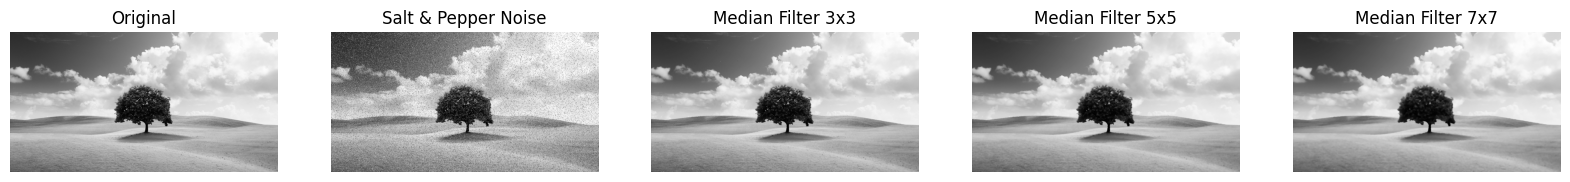

In [10]:
salt_pepper_noisy = random_noise(gray_image, mode='s&p', amount=0.1)
salt_pepper_noisy = (salt_pepper_noisy * 255).astype(np.uint8)

median_filtered_3x3 = cv2.medianBlur(salt_pepper_noisy, 3)
median_filtered_5x5 = cv2.medianBlur(salt_pepper_noisy, 5)
median_filtered_7x7 = cv2.medianBlur(salt_pepper_noisy, 7)

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(salt_pepper_noisy, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(median_filtered_3x3, cmap='gray')
plt.title('Median Filter 3x3')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(median_filtered_5x5, cmap='gray')
plt.title('Median Filter 5x5')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(median_filtered_7x7, cmap='gray')
plt.title('Median Filter 7x7')
plt.axis('off')
plt.show()